autoencoder
class_0 0.129% class_1 0.293% class_2 0.173% class_3 0.405% 

resnext
class_0 0.157% class_1 0.346% class_2 0.145% class_3 0.352% 

pretrained_resnetv2
class_0 0.189% class_1 0.297% class_2 0.173% class_3 0.341% 

pretrained_vgg
class_0 0.180% class_1 0.369% class_2 0.132% class_3 0.319% 

xception
class_0 0.185% class_1 0.328% class_2 0.117% class_3 0.370% 

mobilenet
class_0 0.174% class_1 0.282% class_2 0.211% class_3 0.332% 

nasnet
class_0 0.178% class_1 0.259% class_2 0.211% class_3 0.352% 

densenet
class_0 0.181% class_1 0.335% class_2 0.166% class_3 0.319% 

ensemble
class_0 0.181% class_1 0.346% class_2 0.147% class_3 0.326% 

ensemble_tta
class_0 0.176% class_1 0.357% class_2 0.139% class_3 0.328% 



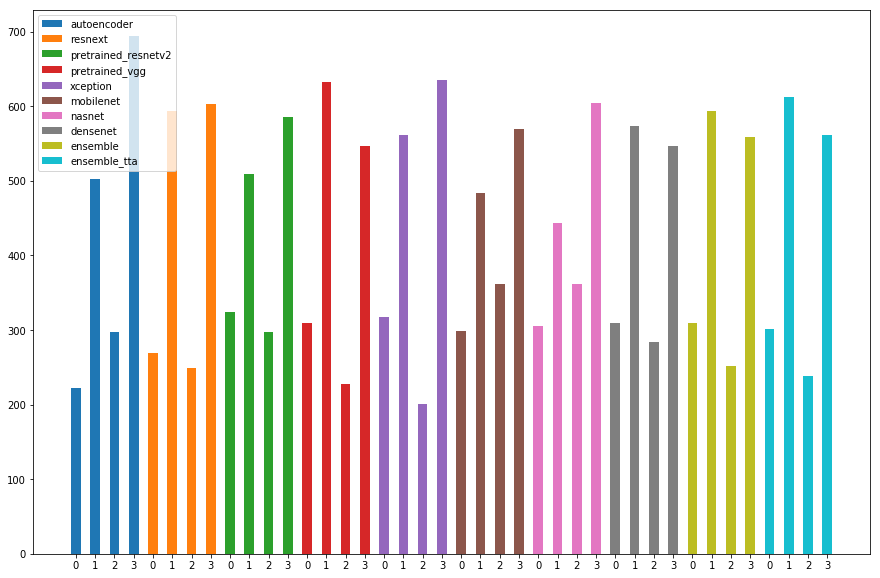

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

path = '/home/seldon/mauna_kea/mldata/results_'
# path = '/home/seldon/mauna_kea/mldata/cv/results_val_'

def plot_classes(ind, data, col):
    classes = OrderedDict()
    classes['class_0'] = 0
    classes['class_1'] = 0
    classes['class_2'] = 0
    classes['class_3'] = 0
    for ex in data[col]:
        name = 'class_' + str(ex)
        if (name in classes):
            classes[name] += 1
    x, y = list(classes.keys()), list(classes.values())
# 	print(classes)
    plt.bar(range(0 + ind, ind + len(y)), y, width = 0.5)
    test = [x / data.shape[0] for x in classes.values()]
    for key, x in zip(classes.keys(), test):
        print("{} {:.3f}% ".format(key, x), end ='')
    print("\n")

nets = ['autoencoder', 'resnext', 'pretrained_resnetv2', 'pretrained_vgg', 'xception', 'mobilenet', 'nasnet', 'densenet', 'ensemble', 'ensemble_tta']
# nets = ['autoencoder', 'resnext', 'pretrained_resnetv2.csv',  'pretrained_vgg', 'xception', 'mobilenet', 'nasnet', 'densenet']#, 'ensemble', 'ensemble_tta']

df_comb = pd.DataFrame()
for model in nets:
    df = pd.read_csv(path + str(model) +'.csv')
    df_comb[str(model)] = df['class_number']

# print(df_comb)
# df_comb['autoencoder'].plot.bar()
# plt.bar(df_comb['autoencoder'], height = 10)
# plt.show()
plt.figure(figsize=(15,10))
# plt.subplots(len(nets))
for i, net in enumerate(nets):
    print(net)
    plot_classes(i * 4, df_comb, net)

plt.xticks(range(len(nets) * 4), ['0', '1', '2', '3'] * len(nets))
plt.legend(nets)
plt.show()



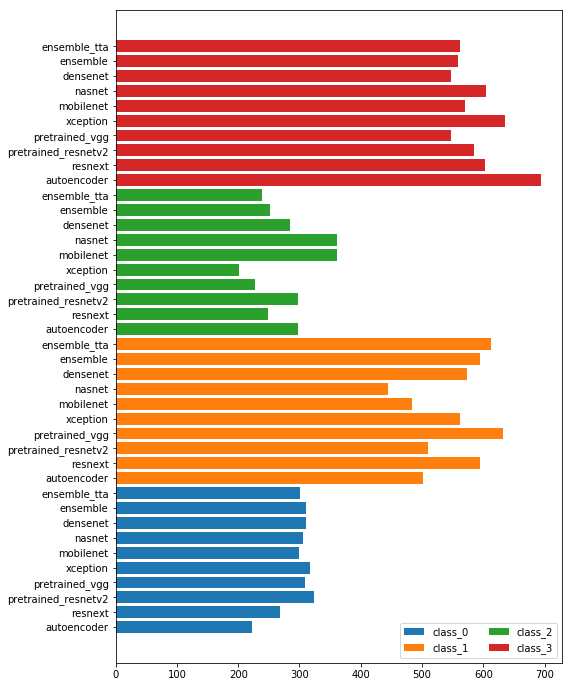

In [12]:
df_comb = pd.DataFrame()
for model in nets:
    df = pd.read_csv(path + str(model) +'.csv')
    df_comb[str(model)] = df['class_number']


plt.figure(figsize=(8,12))

classes = OrderedDict()
classes['class_0'] = OrderedDict()
classes['class_1'] = OrderedDict()
classes['class_2'] = OrderedDict()
classes['class_3'] = OrderedDict()

for i, net in enumerate(nets):
    classes['class_0'][net] = 0
    classes['class_1'][net] = 0
    classes['class_2'][net] = 0
    classes['class_3'][net] = 0
    for ex in df_comb[net]:
        name = "class_" + str(ex)
        if (name in classes):
            classes[name][net] += 1
""
ind = 0
for key, val in classes.items():
    x, y =list(val.keys()), list(val.values())
    plt.barh(range(0 + ind, ind + len(y)), y, height = 0.8)
    ind += len(nets)

# print(classes)
plt.yticks(range(len(nets) * 4), nets * 4)#, rotation='horizontal')
plt.legend(classes.keys(), ncol = 2)
plt.show()

['autoencoder', 'resnext', 'pretrained_resnetv2', 'pretrained_vgg', 'xception', 'mobilenet', 'nasnet', 'densenet', 'ensemble', 'ensemble_tta']


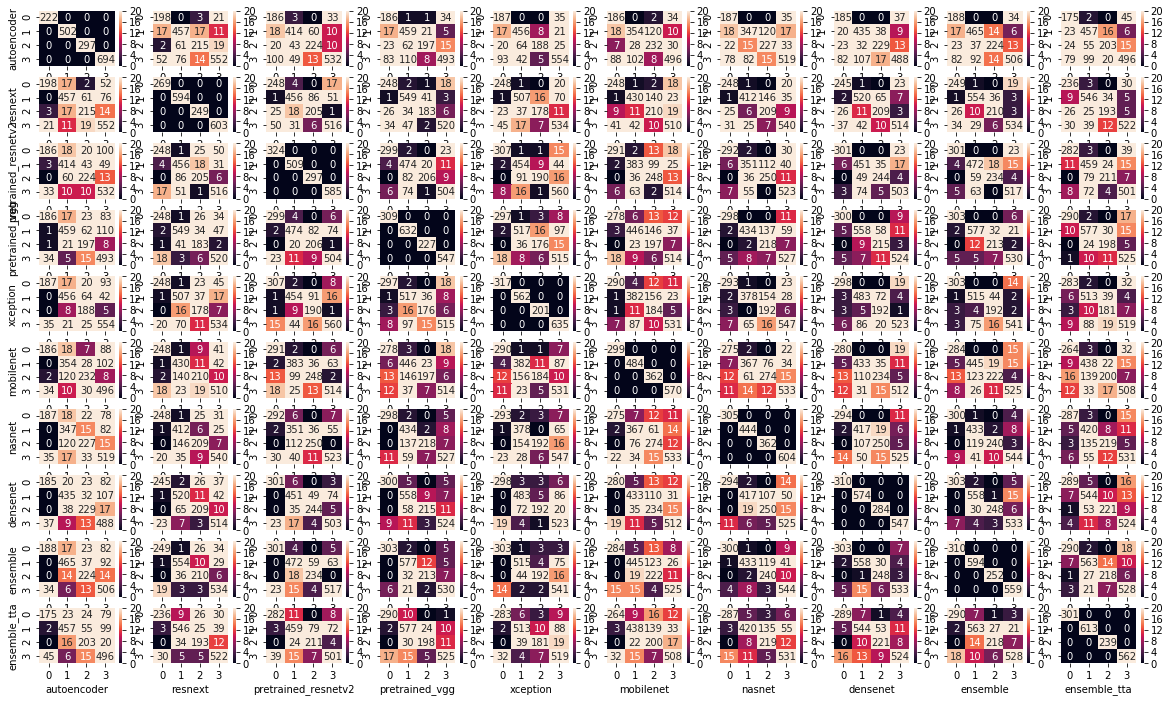

In [13]:
import seaborn as sb
from sklearn.metrics import confusion_matrix, accuracy_score

nets = nets[:]
plt.figure(figsize = (20,12))

for i in range(len(nets)):
    for j in range(len(nets)):
        plt.subplot(len(nets),len(nets), i * len(nets) + j + 1)
        matrix = confusion_matrix(df_comb[nets[i]], df_comb[nets[j]])
        sb.heatmap(matrix, annot=True,  fmt="d", vmin=0, vmax=20)
        if i == len(nets) - 1:
            plt.xlabel(nets[j])
        if j == 0:
            plt.ylabel(nets[i])
print(nets)
plt.show()


In [29]:
lst = {0:5, 1:2, 3:4}
lst_test = [0,1,2]
test = list(lst.keys())
print(test)
print(df_comb.iloc[test]['autoencoder'])
print(df_comb['test'] = lst_test)

SyntaxError: keyword can't be an expression (<ipython-input-29-69b55a94c786>, line 6)